# Kerala and floods
Kerala is a small state in the south Indian peninsula. It is a narrow strip of land between the western ghats and the Arabian sea, which is ranked highest in the country in terms of education, health care and human development index. The densely populated region has 44 rivers, areas that are below mean sea level and mountains as high as 2695m from the sea level.

The monsoon rains in India start from Kerala and the region recieves one of the highest amount of rainfall across the country. Although heavy rainfall is not uncommon to the local people, huge loss of property and lives has become a recurrent theme recently. The state has seen massive floods during 3 (2018, 2019, 2021) of the last 4 monsoon seasons (2018-2021). The floods in 2018 was one of the most severe in its history drawing similarity with the _great floods of '99_ (1924, happened in the year 1099 in Malayalam calendar), a popular reference in local culture. 

When it comes to disaster management, the most crucial thing is predicting the disaster itself. Predicting the chances of floods enables governments and people to prepare for it and thereby, minimize the damages. In this work, we try to predict the chances of floods based on historical rainfall data.

Data, obtained from [Kaggle](https://www.kaggle.com/datasets/mukulthakur177/kerela-flood), has monthly rainfall information during the period 1901-2018.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('kerala.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


Rainfall is reported in mm.

_Caution_ : The data is not comprehensive enough as it lacks information about regional variation. Given the geographical features and location of rivers in the state, huge downpours in certain regions of the state are more likely to result in flooding than in other regions. Nevertheless, we continue our analysis in the hope that a meaningful prediction is possible.

In [3]:
df.rename({' ANNUAL RAINFALL':'ANNUAL'},axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  118 non-null    object 
 1   YEAR         118 non-null    int64  
 2   JAN          118 non-null    float64
 3   FEB          118 non-null    float64
 4   MAR          118 non-null    float64
 5   APR          118 non-null    float64
 6   MAY          118 non-null    float64
 7   JUN          118 non-null    float64
 8   JUL          118 non-null    float64
 9   AUG          118 non-null    float64
 10  SEP          118 non-null    float64
 11  OCT          118 non-null    float64
 12  NOV          118 non-null    float64
 13  DEC          118 non-null    float64
 14  ANNUAL       118 non-null    float64
 15  FLOODS       118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory usage: 14.9+ KB


There is no missing informaton in the data.

In [5]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


The _describe_ function gives insight into the variation of rainfall during the year. The onset of monsoon is in June and the state recieves highest amount of rainfall during the months of June, July and August. The picture becomes more clear when we look at the data graphically. To begin, we look at the change in annual ranfall during 1901-2018.

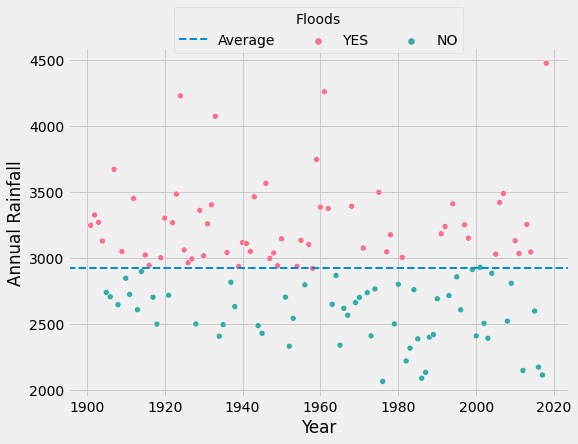

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.YEAR,df['ANNUAL'],hue=df.FLOODS,palette="husl")
plt.xlabel('Year')
plt.ylabel('Annual Rainfall')
plt.axhline(df.ANNUAL.mean(),ls='dashed',lw=2,label='Average')
#plt.axhline(df.ANNUAL.mean()+df.ANNUAL.std(),ls='dotted',lw=2)
plt.legend(bbox_to_anchor=(.5, 1.05), ncol=3,loc='center', title='Floods',borderaxespad=0)

The average annual rainfall is just under 3000mm which means that Kerala recieved almost 50 percent excess rain in 2018, which is also the highest during the period. The above scatter plot is colored by whether the year reported any floods or not. It is interesting to not that all years with an above average rainfall is marked as a flood year. We suspect if the labelling was done correctly. However, an alternative source to verfiy this is not found. At the same time, it is very much likely that heavy rainfall could result in floodings in some of the low lying regions of the state such as [Kuttanad](https://en.wikipedia.org/wiki/Kuttanad), albeit with a lower damage. This means that Kerala is no stranger to floods.

In [7]:
avg_rf=df.iloc[:,2:14].mean()/df.ANNUAL.mean()*100

Text(0.5, 1.0, 'Percentage of average annual rainfall across months')

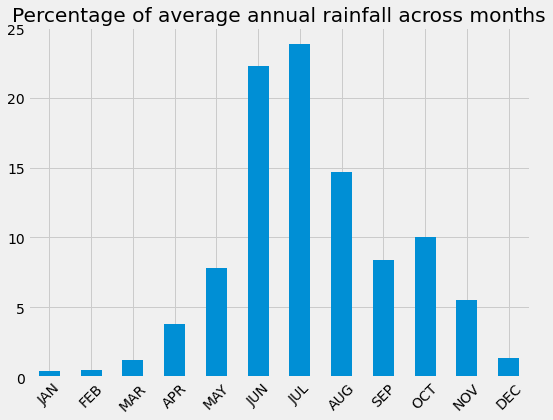

In [8]:
plt.figure(figsize=(8,6))
avg_rf.plot.bar(rot='45')
plt.title('Percentage of average annual rainfall across months')

The bar plot makes it clear that a significant chunk of the total rainfall in a year happens during the early phases of the monsoon. More than half of the total rainfall happens from June to August. It is also worth highlighting that the recent severe floods happened in either July or August.

We now look at the rainfall in these months across the years and try to identify if there are any correlations to floods.

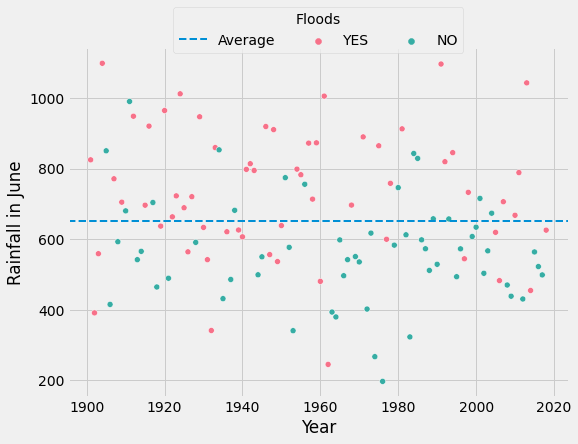

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.YEAR,df['JUN'],hue=df.FLOODS,palette="husl")
plt.xlabel('Year')
plt.ylabel('Rainfall in June')
plt.axhline(df.JUN.mean(),ls='dashed',lw=2,label='Average')
plt.legend(bbox_to_anchor=(.5, 1.05), ncol=3,loc='center', title='Floods',borderaxespad=0)

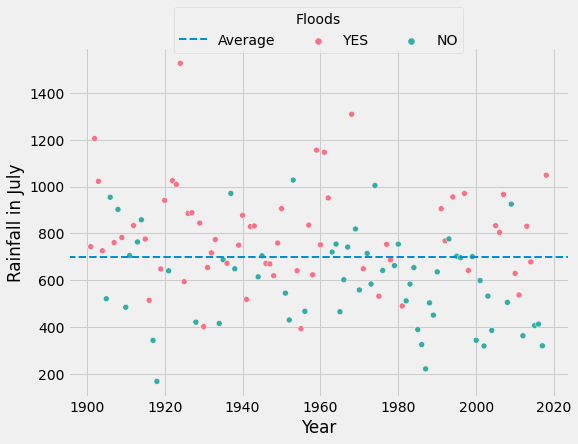

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.YEAR,df['JUL'],hue=df.FLOODS,palette="husl")
plt.xlabel('Year')
plt.ylabel('Rainfall in July')
plt.axhline(df.JUL.mean(),ls='dashed',lw=2,label='Average')
plt.legend(bbox_to_anchor=(.5, 1.05), ncol=3,loc='center', title='Floods',borderaxespad=0)

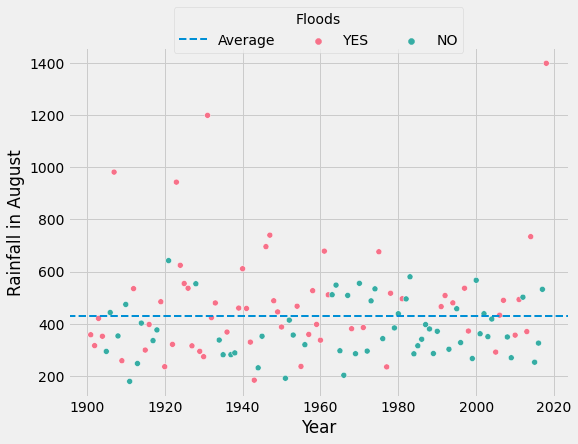

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.YEAR,df['AUG'],hue=df.FLOODS,palette="husl")
plt.xlabel('Year')
plt.ylabel('Rainfall in August')
plt.axhline(df.AUG.mean(),ls='dashed',lw=2,label='Average')
plt.legend(bbox_to_anchor=(.5, 1.05), ncol=3,loc='center', title='Floods',borderaxespad=0)

In [12]:
df['SWM']=df.JUN+df.JUL+df.AUG

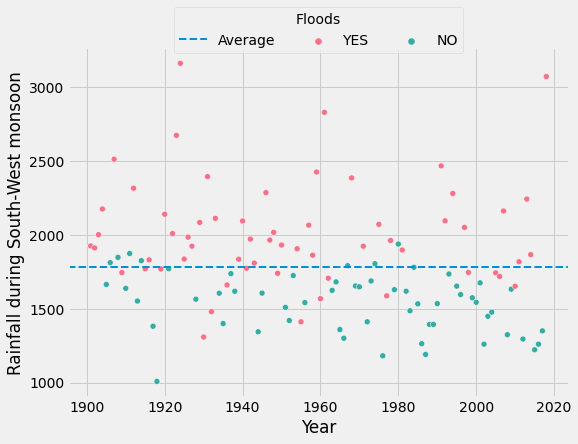

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.YEAR,df['SWM'],hue=df.FLOODS,palette="husl")
plt.xlabel('Year')
plt.ylabel('Rainfall during South-West monsoon')
plt.axhline(df.SWM.mean(),ls='dashed',lw=2,label='Average')
plt.legend(bbox_to_anchor=(.5, 1.05), ncol=3,loc='center', title='Floods',borderaxespad=0)

Although no clear patterns emerge, if there is excess rainfall happening during June-August, there are high chances that flood may occur.

We now look at how excess rainfall in any of these months is associated with floods.

In [14]:
df['Excess_JUN']=df.JUN>df.JUN.mean()
df['Excess_JUL']=df.JUL>df.JUL.mean()
df['Excess_AUG']=df.AUG>df.AUG.mean()
df['Excess_SW']=df.Excess_JUN+df.Excess_JUL+df.Excess_AUG

(-0.5, 1.5)

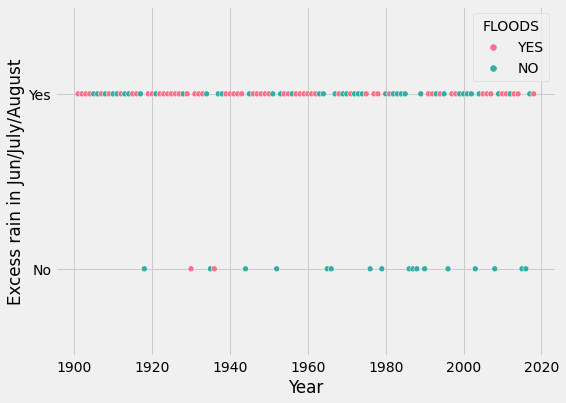

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.YEAR,df.Excess_SW,hue=df.FLOODS,palette='husl')
plt.xlabel('Year')
plt.ylabel('Excess rain in Jun/July/August')
plt.yticks([0,1],['No','Yes'])
plt.ylim([-0.5,1.5])

From the above plot, it is clear that all flood years, except two, had excess rainfall in either June or July or August. However, floods were reported in years when the rainfall recieved during these months were normal which makes it difficult to reach a conclusion.

In [16]:
rf=np.arange(2000)
df.FLOODS.value_counts()

YES    60
NO     58
Name: FLOODS, dtype: int64

Since we are dealing with a continuous variable like rainfall, it is imperative to look at the distribution of rainfall over the years. We report them separetely here for _flood years_ (years that reported floods) and _no-flood years_ (years in which no floods were reported).

Text(0.5, 1.0, 'Density plot of rainfall in the month of June')

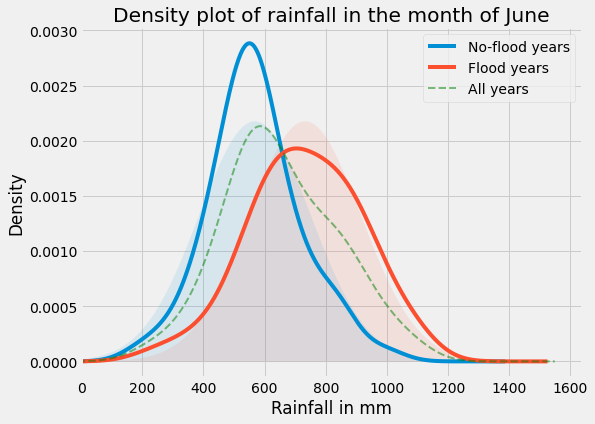

In [17]:
plt.figure(figsize=(8,6))
df[df.FLOODS=='NO'].JUN.plot.density(label='No-flood years')
df[df.FLOODS=='YES'].JUN.plot.density(label='Flood years')
df.JUN.plot.density(ls='dashed',color='green',label='All years',alpha=0.5,lw=2)
plt.xlim(left=0)
plt.legend()
plt.fill_between(rf,norm.pdf(rf,df[df.FLOODS=='NO'].JUN.mean(),df[df.FLOODS=='YES'].JUN.std()),
                 0,alpha=0.1)
plt.fill_between(rf,norm.pdf(rf,df[df.FLOODS=='YES'].JUN.mean(),df[df.FLOODS=='YES'].JUN.std()),
                 0,alpha=0.1)
plt.xlabel('Rainfall in mm')
plt.title('Density plot of rainfall in the month of June')

Text(0.5, 1.0, 'Density plot of rainfall in the month of July')

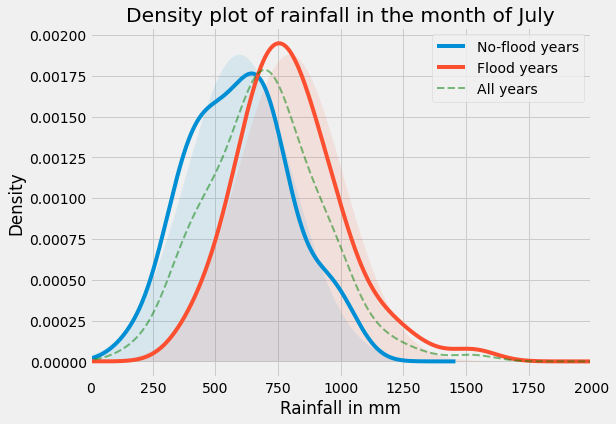

In [18]:
plt.figure(figsize=(8,6))
df[df.FLOODS=='NO'].JUL.plot.density(label='No-flood years')
df[df.FLOODS=='YES'].JUL.plot.density(label='Flood years')
df.JUL.plot.density(ls='dashed',color='green',label='All years',alpha=0.5,lw=2)
plt.xlim(left=0,right=2000)
plt.legend()
plt.fill_between(rf,norm.pdf(rf,df[df.FLOODS=='NO'].JUL.mean(),df[df.FLOODS=='YES'].JUL.std()),
                 0,alpha=0.1)
plt.fill_between(rf,norm.pdf(rf,df[df.FLOODS=='YES'].JUL.mean(),df[df.FLOODS=='YES'].JUL.std()),
                 0,alpha=0.1)
plt.xlabel('Rainfall in mm')
plt.title('Density plot of rainfall in the month of July')

Text(0.5, 1.0, 'Density plot of rainfall in the month of August')

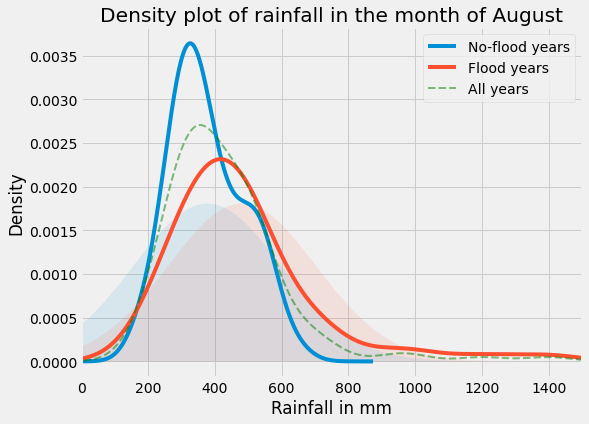

In [19]:
plt.figure(figsize=(8,6))
df[df.FLOODS=='NO'].AUG.plot.density(label='No-flood years')
df[df.FLOODS=='YES'].AUG.plot.density(label='Flood years')
df.AUG.plot.density(ls='dashed',color='green',label='All years',alpha=0.5,lw=2)
plt.xlim(left=0,right=1500)
plt.legend()
plt.fill_between(rf,norm.pdf(rf,df[df.FLOODS=='NO'].AUG.mean(),df[df.FLOODS=='YES'].AUG.std()),
                 0,alpha=0.1)
plt.fill_between(rf,norm.pdf(rf,df[df.FLOODS=='YES'].AUG.mean(),df[df.FLOODS=='YES'].AUG.std()),
                 0,alpha=0.1)
plt.xlabel('Rainfall in mm')
plt.title('Density plot of rainfall in the month of August')

In the density plots above, the corresponding Gaussian distributions are also shown by means of highlighted regions. The shift towards right is immediately clear.

### Naive Bayesian Prediction
We use a Gaussian Naive Bayes classifier to predict the floods. Based on the data analysis above, we try to develop our model based on the rainfall in the months of May, June, July and August. There are a few reasons to include the month of May as well. Recent floods were mostly due to the dams being filled to their capacity and hence, had to be opened. It was the regions on the banks of the rivers that suffered most damage. Thus it can be argued that the existing water level in dams prior to the monsoon is a huge factor. Although the water level data is unavailable, we estimate that the summer rains gives a fair reflection of the ground truth.

$$P(Flood|rainfall\ in\ May\ to\ August)\propto P(Flood)\cdot P(Rainfall\ in\ May|Flood)\cdot P(Rainfall\ in\ June|Flood)\cdot P(Rainfall\ in\ July|Flood)\cdot P(Rainfall\ in\ August|Flood)$$

Since we are dealing with a continuous variable, instead of probability, we have to use the liklihood estimates from the underlying Gaussian distribution. The Gaussian Naive Bayes classifier from sklearn library is used.

In [30]:
# Import modelling functions and libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [68]:
X=df[['MAY','JUN','JUL','AUG']]
Y=df.FLOODS
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

In [69]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

Confusion matrix, without normalization
[[10  3]
 [ 5 12]]


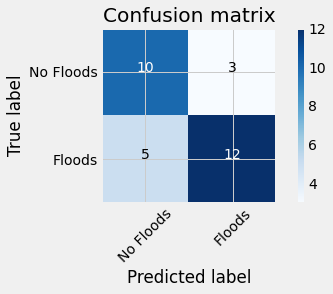

In [70]:
test_prediction=gnb.predict(x_test)
cnf_matrix=confusion_matrix(y_test,test_prediction)
plot_confusion_matrix(cnf_matrix,classes=['No Floods','Floods'])

In [71]:
print('Accuracy score\t: ',np.round(accuracy_score(y_test,test_prediction),3))
pre=np.round(cnf_matrix[1,1]/sum(cnf_matrix[:,1]),3)
rec=np.round(cnf_matrix[1,1]/sum(cnf_matrix[1,:]),3)
f1=np.round(2*pre*rec/(pre+rec),3)
print('Precision\t: ',pre)
print('Recall \t\t: ',rec)
print('F1 score\t: ',f1)

Accuracy score	:  0.733
Precision	:  0.8
Recall 		:  0.706
F1 score	:  0.75


The trained model performs reasonably well on the test set. The recall is only about 0.7 which means that the model may miss to predict floods in a given year. We now look at the probability itself for the entire data set. The classifier sets the class based on the threshold value of 0.5.

In [72]:
probability=gnb.predict_proba(X)
df['PROB']=probability[:,1]

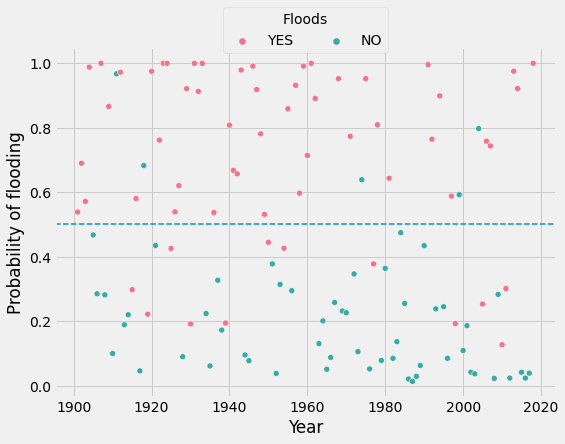

In [74]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.YEAR,df['PROB'],hue=df.FLOODS,palette="husl")
plt.xlabel('Year')
plt.ylabel('Probability of flooding')
plt.axhline(0.5,ls='dashed',lw=1.5)
plt.legend(bbox_to_anchor=(.5, 1.05), ncol=3,loc='center', title='Floods',borderaxespad=0)

The probability value shown above suggests that we may not get a better classifier by lowering the thresholds value. The predicted probability for some of the flood years are around 0.2. The inaccuracy of the model can be attributed to the non-Gaussian nature of the rainfall distribution which was observed earlier.

# Early prediction based on temperature
Although the above models may seem good enough to predict the occurence of floods, it will be of limited advantage in practice. The reason is that we are using average rainfall data to predict flood, but rainfall is not a _precursor_ to floods. For example, in 2018 much of the rain happened on one single day and overnight many regions were flooded. Thus the model does not provide enough time for preparation. For disaster management, early prediction is the key. We have to look for alternative approaches to facilitate early prediction.

The monsoons are a result of many factors such as temperature difference between land and sea, and the evaporation from the sea surface. While the temperature difference draws the monsoon clouds to the Indian peninsula, the moisture content of the clouds depend on sea surface temperature, which is exacebrated by global warming. We try to find any relationship between monthly rainfall in Kerala and the temperature on the land in the months preceding and during the monsoon. Although, temperature data from different stations are available, they are plagued by missing data for very large periods. Instead, we resort to the average temperature across stations in the country for the period 1901 to 2019, which is provided by the [Open Government Data platform](https://data.gov.in/).

In [82]:
# read data
td=pd.read_csv('Monthly_Mean_Temp.csv')
td.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95,24.23,18.71,26.06,27.30,21.92
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78,24.33,19.70,26.44,27.18,21.49
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29,23.80,19.05,25.47,27.17,21.27
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84,23.86,18.66,25.84,26.83,21.42
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71,23.71,17.58,24.99,27.37,21.48


In [83]:
# drop irrelevant data
td.drop(['SEP','OCT','NOV','DEC','ANNUAL','JAN-FEB','MAR-MAY','JUN-SEP','OCT-DEC'],axis=1,inplace=True)
td.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47


In [84]:
swrf=df[['YEAR','MAY','JUN','JUL','AUG']]

In [87]:
# combine relevant period from rainfall and temperature dataframes
rft=pd.merge(left=swrf,right=td,on='YEAR',how='left',suffixes=('_RF','_T'))
rft.head()

,YEAR,MAY_RF,JUN_RF,JUL_RF,AUG_RF,JAN,FEB,MAR,APR,MAY_T,JUN_T,JUL_T,AUG_T
0,1901,174.7,824.6,743.0,357.5,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98
1,1902,134.5,390.9,1205.0,315.8,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05
2,1903,249.7,558.6,1022.5,420.2,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63
3,1904,235.7,1098.2,725.5,351.8,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73
4,1905,263.3,850.2,520.5,293.6,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47


In [93]:
rft.corr()['MAY_RF'][['JAN','FEB','MAR','APR','MAY_T']]

JAN     -0.038473
FEB     -0.037782
MAR      0.018603
APR     -0.093622
MAY_T   -0.187770
Name: MAY_RF, dtype: float64

In [94]:
rft.corr()['JUN_RF'][['JAN','FEB','MAR','APR','MAY_T','JUN_T']]

JAN     -0.074791
FEB     -0.214819
MAR     -0.074111
APR     -0.050182
MAY_T   -0.115202
JUN_T   -0.233324
Name: JUN_RF, dtype: float64

In [95]:
rft.corr()['JUL_RF'][['JAN','FEB','MAR','APR','MAY_T','JUN_T','JUL_T']]

JAN     -0.068647
FEB     -0.134721
MAR     -0.039214
APR     -0.084941
MAY_T   -0.108427
JUN_T    0.092501
JUL_T   -0.116606
Name: JUL_RF, dtype: float64

In [96]:
rft.corr()['AUG_RF'][['JAN','FEB','MAR','APR','MAY_T','JUN_T','JUL_T','AUG_T']]

JAN      0.193899
FEB      0.124927
MAR      0.067518
APR      0.309905
MAY_T    0.150030
JUN_T    0.254311
JUL_T    0.094991
AUG_T    0.082827
Name: AUG_RF, dtype: float64

We can see above that the correlation between temperature and rainfall is not so high. Nevertheless, we try to discover some complex relationships using deep learning models.

In [168]:
T5=rft[['JAN','FEB','MAR','APR','MAY_T']]
R5=rft.MAY_RF
T5_train,T5_test,R5_train,R5_test=train_test_split(T5,R5,test_size=0.25,random_state=1)

In [148]:
nf=T5_train.shape[1]
may_rf=tf.keSequential()
may_rf.add(tf.keras.layers.Dense(5,activation='sigmoid',kernel_initializer='he_normal',input_dim=nf))
may_rf.add(tf.keras.layers.Dense(10,activation='sigmoid',kernel_initializer='he_normal'))
may_rf.add(tf.keras.layers.Dense(10,activation='sigmoid',kernel_initializer='he_normal'))
may_rf.add(tf.keras.layers.Dense(5,activation='sigmoid',kernel_initializer='he_normal'))
may_rf.add(tf.keras.layers.Dense(1,kernel_initializer='normal'))
may_rf.compile(optimizer='adam',loss='mse')

In [149]:
may_rf.fit(T5_train,R5_train,epochs=200,batch_size=80,verbose=0)
print('RMS error \t:',np.sqrt(may_rf.evaluate(T5_test,R5_test,verbose=0)))

RMS error 	: 310.0178296283941


**The error is too large. It is worth recalling that the correlation between rainfall and temperature (available data) is poor which suggests that there could be no relation between both of them.** So any attempt to model that could be futile. 

One of the reasons for this could be the selection of temperature data set. India is a vast country with extreme weather conditions like hot deserts and cold snow-capped mountains. It is highly possible that an average measure of temperature across the country does not fairly represent the temperature indicators relevant in the case of monsoon. Furthermore, temperature data from the [intertropical convergence zone](https://en.wikipedia.org/wiki/Intertropical_Convergence_Zone) better represents the evaporation rate and thus, the moisture content of monsoon winds. Therefore it is worth exploring the correlation between rainfall in Kerala and temperature data from the Thar desert (which drives monsoons to the country) or ICTZ (where clouds originate).

In [26]:
# Function that plots confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')